In [16]:
import time
from StepParser import *
import yaml

start = time.time()
ifc = parse_file('test.step')

print('parsed in ', time.time() - start)


parsed in  0.010982990264892578


In [17]:
import matplotlib.pyplot as plt
import networkx as nx

#G = nx.random_geometric_graph(200,0.125)

130
266


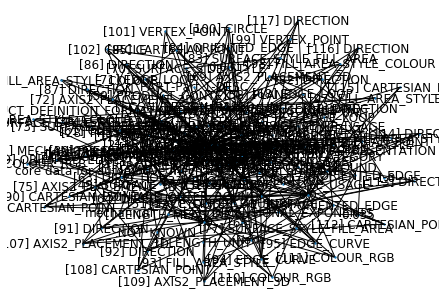

In [19]:
def token_by_id(id):
    for token in ifc:
        if type(token) is not Token:
            continue
        if token.id == id:
            return token
    return None

G = nx.Graph()
labels = {}

def parse_token_to_graph(token, parent = None):
    #print(type(token))
    if type(token) is Anchor:
        tt = token_by_id(token.id)
        if tt is not None:
            labels[parent] = parent
            labels[tt] = tt
            G.add_edge(parent,tt,color='red',weight=1,size=500)
    elif type(token) is Token:
        for a in token.arguments:            
            parse_token_to_graph(a, token)
    elif type(token) is list:
        for item in token:
            parse_token_to_graph(item, parent)    
    else:
        if parent is not None:
            labels[token] = token
            labels[parent] = parent

            G.add_edge(parent,token,color='green',weight=1,size=500)

for token in ifc:
    if type(token) is not Token:
        continue
        
    parse_token_to_graph(token)
            

print(len(G.nodes))
print(len(G.edges))
#pos = nx.kamada_kawai_layout(G)
pos = nx.spiral_layout(G)
nx.draw(G, pos = pos, node_size = 2, with_labels = True)

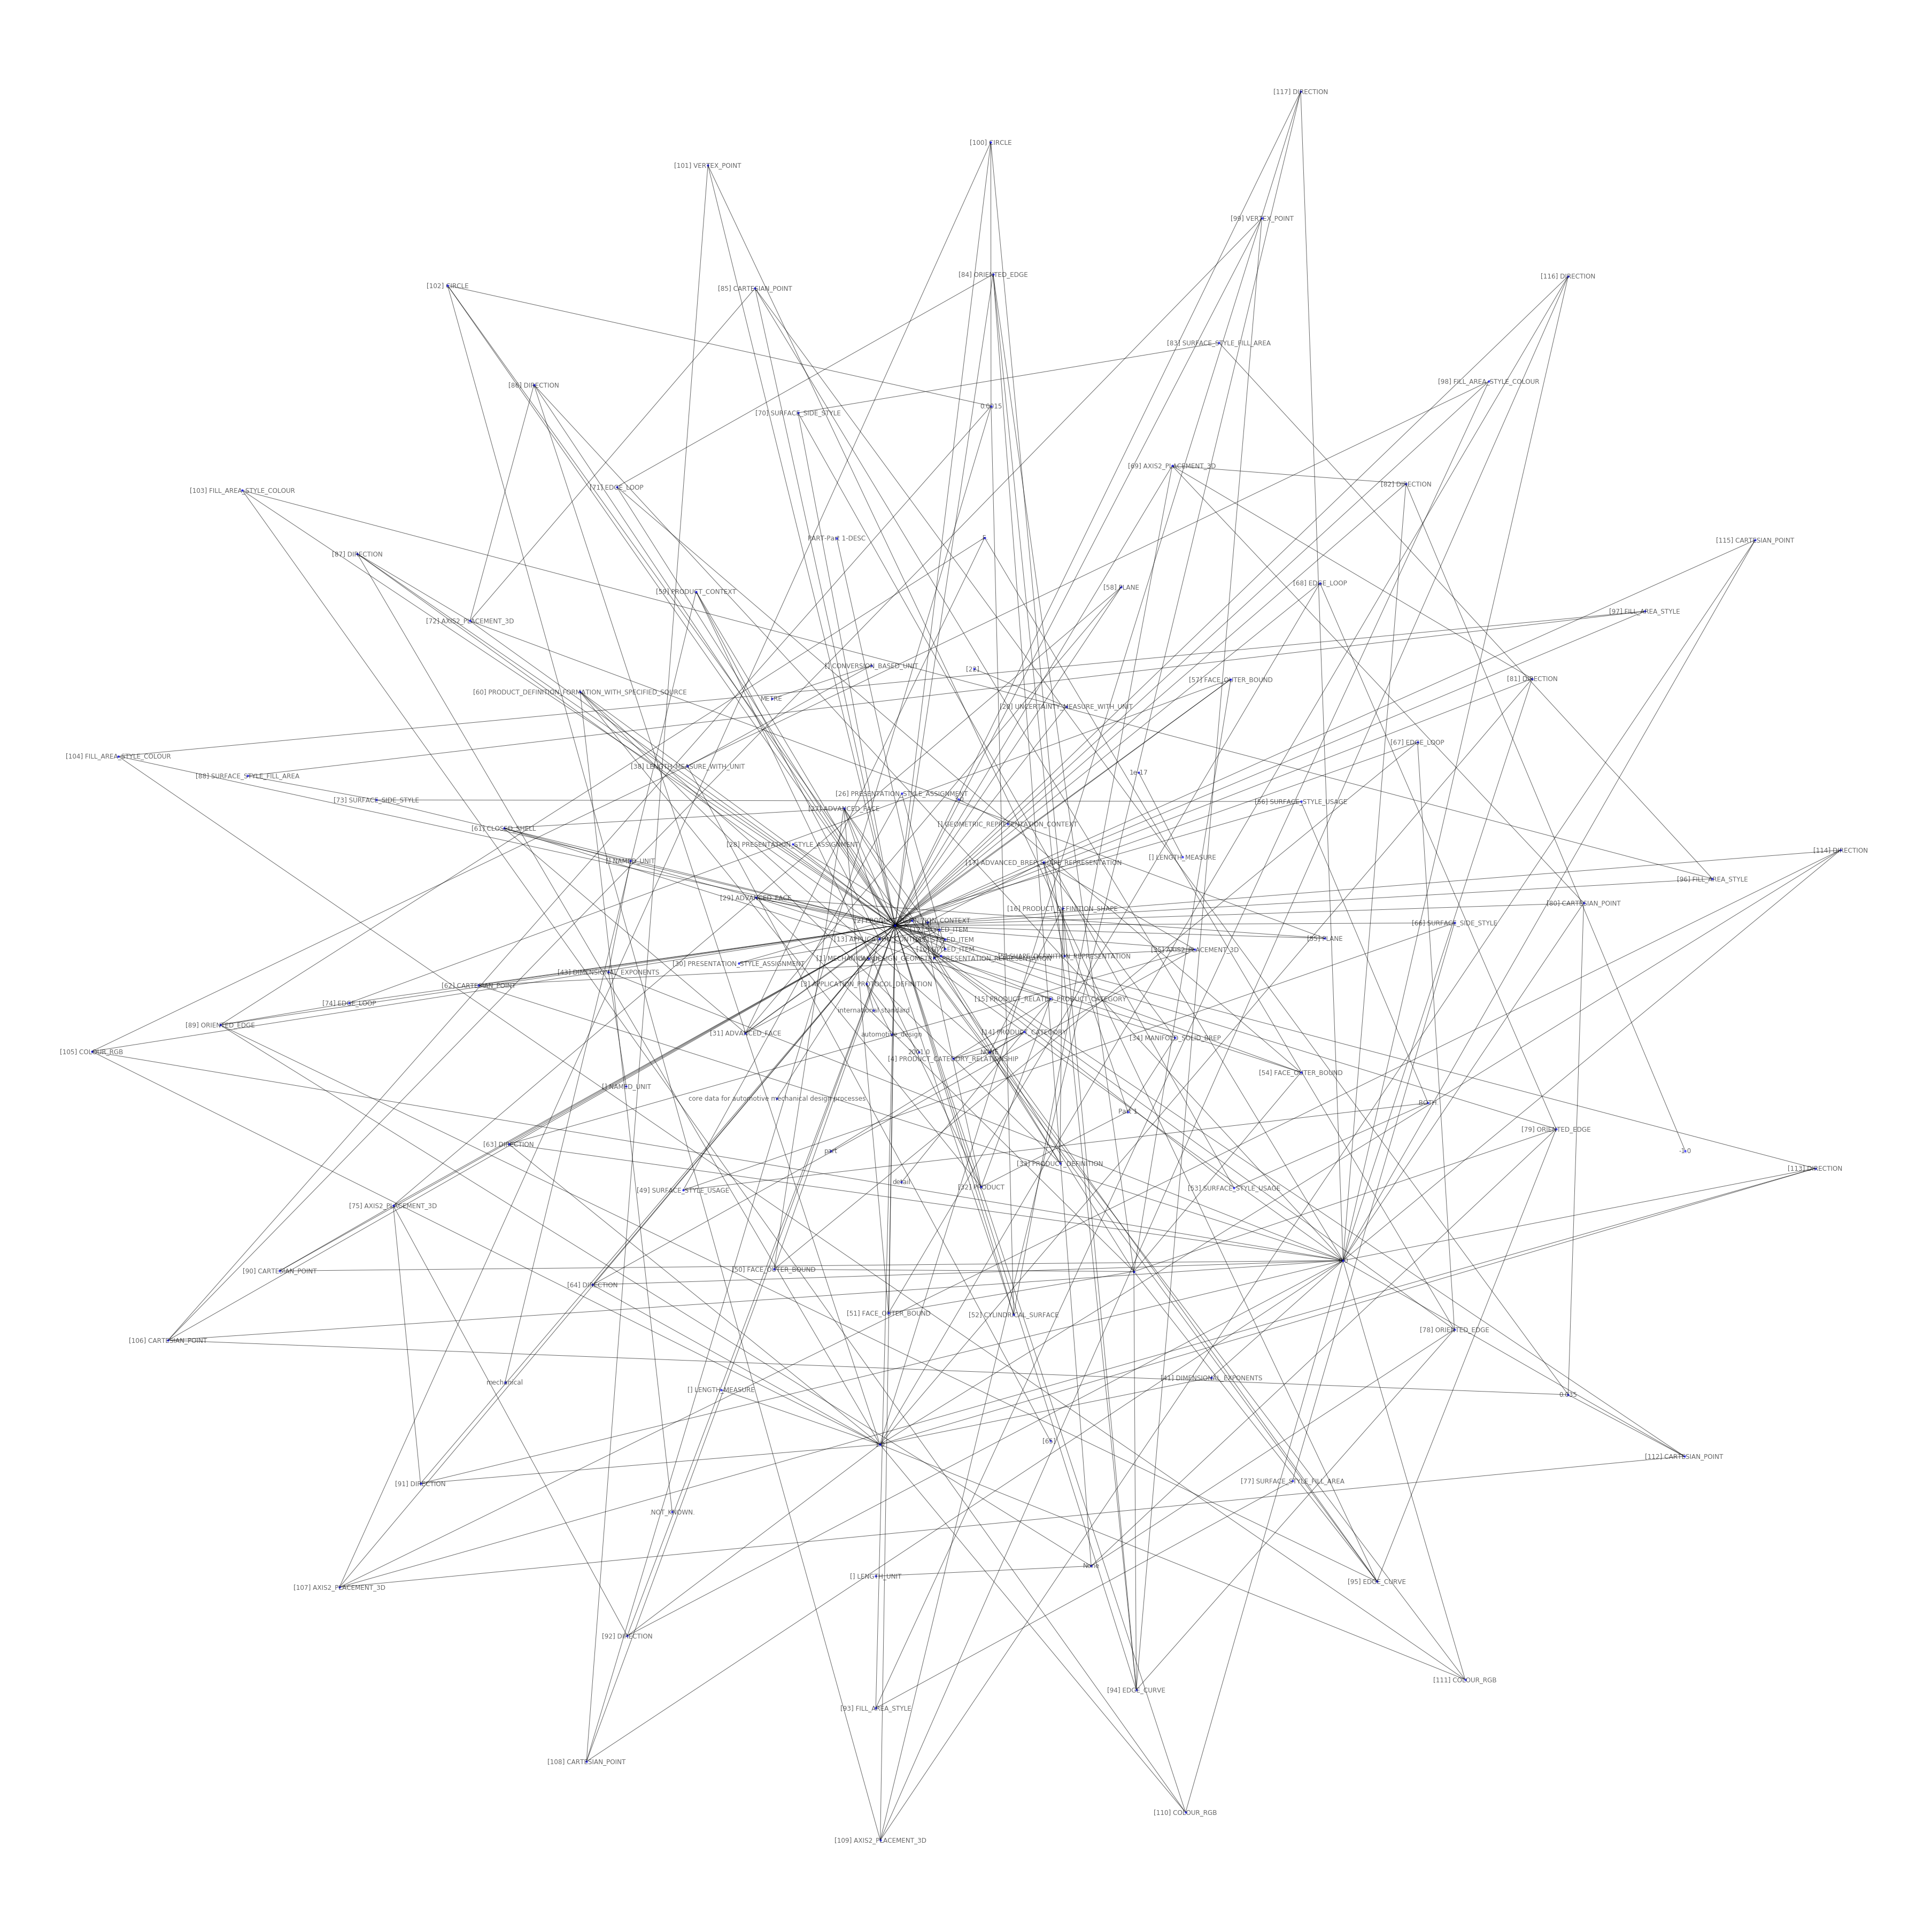

In [20]:
plt.figure(figsize=(50,50))
nx.draw(G,pos=pos, with_labels=True, node_color="blue", alpha= 0.6, node_size=12, labels = labels)

plt.savefig("graph.png")
plt.show()

In [8]:
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(30, 30))
nx.draw(G, pos, node_size=2, alpha=0.5, node_color="blue", with_labels=True)
plt.axis('equal')
plt.savefig("circ_tree_graph.png")
plt.show()

"twopi" with args ['-Tdot', 'C:\\Users\\mihan\\AppData\\Local\\Temp\\tmpcb4dyim2'] returned code: 1

stdout, stderr:
 b''
b"Error: C:\\Users\\mihan\\AppData\\Local\\Temp\\tmpcb4dyim2: syntax error in line 9 near ';'\r\n"



AssertionError: 1